# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [ ]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
print('Results: ', results)

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

In [ ]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [ ]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import numpy as np
a=np.array([1,2., 3.])
b=np.array([0., 0., 5.])
rew=(abs(a - b)).sum()
print(rew)

In [ ]:
import numpy as np
w = np.random.normal(
            size=(6, 4),  # weights for simple linear policy: state_space x action_space
            scale=(900 / (2 * 6))) # start producing actions in a decent range
state= np.array([0.0, 0.0, 10.0, 0.0, 0.0, 0.0])
action = np.dot(state, w) 
print(w)
print(action)

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## Hyperparameters

In [4]:
# Simulation parameters
num_episodes = 50        # max number of episodes to learn from
run = 5.                  # time limit of the episode
explore =10000            #number of iterations for which noise is applied
epsilon = 1               #used to decay noise

# Algorithm parameters
gamma = 0.99                   # future reward discount
tau = 0.001                     # for soft update of target parameters

# Memory parameters
buffer_size = 10000            # memory capacity
batch_size = 32          # experience mini-batch size


## DDPG Agent Training for TakeOff task (Actor-Critic)

In [5]:
import numpy as np
import sys
import pandas as pd
from agents.agent import DDPG #needs to be amended
from tasks.takeoff import Task

# Modify the values below to give the quadcopter a different starting and target position.
start_pose = np.array([0., 0., 0. , 0., 0., 0.])  # initial pose
start_velocities = np.array([0., 0., 0.])         # initial velocities
start_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([0., 0., 20])

# Reward monitor - Check if agent is learning and whether reward is effective
reward_label = ['episode', 'reward']
episode_rewards = {x : [] for x in reward_label}
best_score = -np.inf
best_ep = 0


#setup 
task = Task(init_pose= start_pose ,init_velocities= start_velocities, init_angle_velocities= start_angle_velocities ,runtime= run, target_pos=target_pos) # Create task
agent = DDPG(task, gamma, tau, buffer_size, batch_size) # Create Agent and build actor and critic models

#simulate
for i_episode in range(1, num_episodes+1):
    print("Episode in progress: ", i_episode)
    #print("My specified vel is:", start_velocities)
    state = agent.reset_episode() # rest noise and environment to initial conditions
    #print("Simulation v (x,y,z) :", task.sim.v)
    #print("Resetted State (z,  vz) : ",state)
    score=0
    count=0
    while True:
        action = agent.act(state) #,max(epsilon,0) #Rotor speeds agent will set as per actor local model +some noise for exploration
        #epsilon -= 1/explore
        '''
        print("Position (x,y,z) :", task.sim.pose[:3])
        
        print("State (z, vx, vy, vz) : ",state)
        print("Rotor speeds: ",action)
        '''
        next_state, reward, done = task.step(action)# Simulate rotor speeds to get next state and reward
        #print("Reward :", reward)
        agent.step(action, reward, next_state, done) #save experience, learn if possible and roll over state
        state = next_state
        score += reward
        count += 1
        if done:
            #print("State (z, vx, vy, vz) : ",state)
            ep_score =score/float(count* task.action_repeat) if count > 0 else 0 #average score for episode
            if ep_score> best_score:
                best_score = ep_score
                best_ep = i_episode
            print("Ending position for episode :", task.sim.pose[:3])
            print("Ending speed for episode :", task.sim.v) 
            print("\n Episode end Episode = {:4d}, Time = {:7.3f} totalscore = {:7.3f}  score = {:7.3f} (best = {:7.3f} in Episode {:4d} ) ".format(
                i_episode,task.sim.time, score,  ep_score,best_score,best_ep), end="\n")  
            break
    episode_rewards['episode'].append(i_episode)
    episode_rewards['reward'].append(ep_score)
    #sys.stdout.flush()

Episode in progress:  1
Ending position for episode : [ 0.          0.         84.63148187]
Ending speed for episode : [ 0.          0.         28.16478697]

 Episode end Episode =    1, Time =   5.040 totalscore = -128.095  score =  -0.508 (best =  -0.508 in Episode    1 ) 
Episode in progress:  2
Ending position for episode : [ 0.          0.         77.16600533]
Ending speed for episode : [0.         0.         4.02016008]

 Episode end Episode =    2, Time =   5.040 totalscore = -163.593  score =  -0.649 (best =  -0.508 in Episode    1 ) 
Episode in progress:  3
Ending position for episode : [0.         0.         1.45129218]
Ending speed for episode : [0.         0.         0.14606079]

 Episode end Episode =    3, Time =   5.040 totalscore =  99.229  score =   0.394 (best =   0.394 in Episode    3 ) 
Episode in progress:  4
Ending position for episode : [0.         0.         1.10839155]
Ending speed for episode : [0.         0.         0.15876869]

 Episode end Episode =    4, T

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

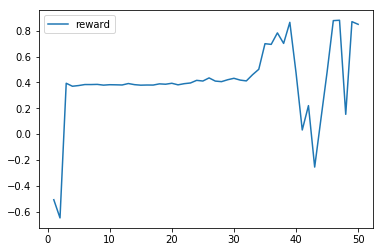

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(episode_rewards['episode'], episode_rewards['reward'], label='reward')
plt.legend()
_ = plt.ylim()

In [9]:
%load_ext autoreload
%autoreload 2

# Modify the values below to give the quadcopter a different starting and target position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0. , 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([0., 0., 20.])
file_output = 'data.txt'                         # file name for saved results

# Monitor quadcopter behaviour
quad_label = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1']
quad = {x : [] for x in quad_label}

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
done = False

# Run the simulation, and save the results.
state = agent.reset_episode() # start a new episode
score=0
count=0
while True:
    rotor_speeds = agent.act(state)
    next_state, reward, done = task.step(action)
    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
    for ii in range(len(quad_label)):
        quad[quad_label[ii]].append(to_write[ii])
    state = next_state
    score += reward
    count += 1
    if done:
        ep_score =score/float(count* task.action_repeat) if count > 0 else 0 #average score for episode
        print("Ending position for episode :", task.sim.pose[:3])
        print("Ending speed for episode :", task.sim.v) 
        print("\n Episode end Episode = {:4d}, Time = {:7.3f} totalscore = {:7.3f}  score = {:7.3f}  ".format(
                i_episode,task.sim.time, score,  ep_score), end="\n")  
        break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Ending position for episode : [ 0.          0.         25.51162951]
Ending speed for episode : [0.         0.         7.45285237]

 Episode end Episode =   50, Time =   5.040 totalscore = -95.760  score =  -0.380  


Position of quad in x, y and z Axes


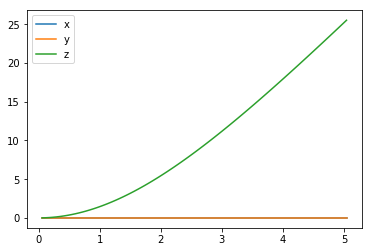

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# rotor positions in x,y and z axes
print('Position of quad in x, y and z Axes')
plt.plot(quad['time'], quad['x'], label='x')
plt.plot(quad['time'], quad['y'], label='y')
plt.plot(quad['time'], quad['z'], label='z')
plt.legend()
_ = plt.ylim()

Velocity of rotor in x, y and z Axes


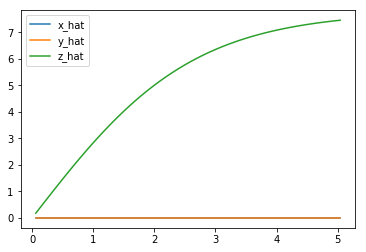

In [11]:
# rotor Velocity in x,y and z axes
print('Velocity of rotor in x, y and z Axes')
plt.plot(quad['time'], quad['x_velocity'], label='x_hat')
plt.plot(quad['time'], quad['y_velocity'], label='y_hat')
plt.plot(quad['time'], quad['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Euler Angles of rotor


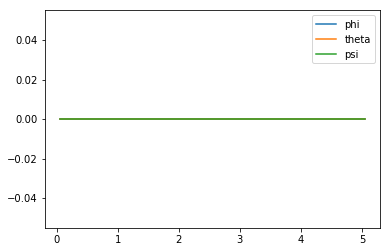

In [12]:
# Euler angles of rotor
print('Euler Angles of rotor')
plt.plot(quad['time'], quad['phi'], label='phi')
plt.plot(quad['time'], quad['theta'], label='theta')
plt.plot(quad['time'], quad['psi'], label='psi')
plt.legend()
_ = plt.ylim()

Angular velocity of rotor


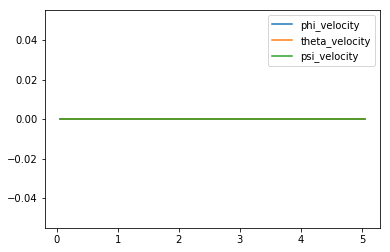

In [13]:
# Angular velocity of rotor
print('Angular velocity of rotor')
plt.plot(quad['time'], quad['phi_velocity'], label='phi_velocity')
plt.plot(quad['time'], quad['theta_velocity'], label='theta_velocity')
plt.plot(quad['time'], quad['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Speed of each rotor


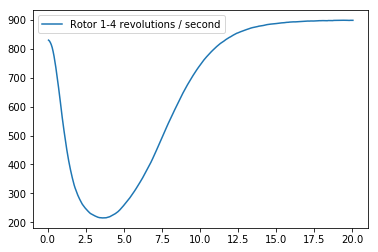

In [9]:
# rotor speeds
print('Speed of each rotor')
plt.plot(quad['time'], quad['rotor_speed1'], label='Rotor 1-4 revolutions / second')
plt.legend()
_ = plt.ylim()

In [14]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode

print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 0.          0.         25.51162951  0.          0.          0.        ]
[0.         0.         7.45285237]
[0. 0. 0.]


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: 

**Task Definition**  
The task i defined involves taking off to a user-specified height,with no movement in the x and y axes as well as no rotation. After a number of iterations with the state space and the action space, I opted to restrict the state space to just 2 variables ( vertical height and vertical velocity) and I reduced the action space from 4 to 1. By restricting all 4 rotors to have the same speed, I would be able to guarantee no movement in the x and y axes as well as no rotation. This also reduced the number of variables and hence facilated the learning process for the agent.


**Reward Design**  
Initially,my quadcopter did not really want to climb so I had to implement a penalty if the vertical position of the quadcopter was less than the starting position. I also imposed penalties on the quadcopter for hitting the environment bounds.

In terms of providing continual reward for each time step, I implemented a sine reward that peaks when the quadcopter is at the target height. On top of providing the agent with a smooth reward function from ground level to 3 times the target height, this function is also convenient as it is bound by one and hence will not lead to exploding gradients.
The next step of the reward function was to provide feedback based on whether the quadcopter was moving towards the target height - in this case, I added an incremental reward/penalty based on whether the quadcopter was moving toward its desired position. 

The quadcopter would almost always overshoot the target position when climbing because of the momentum it built by accelerating from a rest position. To remediate this, the agent was penalised for having a speed greater than half the target height.

Finally, I noticed during training that episodes which were closer to the target height were still ending up with lower scores than those that ended up further away.This is most likely due to the previous actions of the agent during the episode. To fully incentivise the agent to be as close to the target height as possible when the episode ends, I added a bonus reward which was maximised when the quadcopter finishes the episode at the targetheight.


        

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Learning Algorithm**  
I used the DDPG learning algorithm as it is suitable for continous states and action spaces.
The following blog proved to be resourceful in understanding DDPG better and helped me in designing the quadcopter actor and critic: https://yanpanlau.github.io/2016/10/11/Torcs-Keras.html

**Hyperparameters**  
gamma = 0.99  
tau = 0.001
mu = 0
theta = 0.15
sigma = 0.2
Actor learning rate: 0.0001  
Critic learning rate: 0.001  

**Neural Network Architecture**  
- Actor:
    - Hidden Layer 1: Dense network with 400 units,l2 regularisation with batch normalisation. Layer used relu activation.
    - Hidden Layer 2: Dense network with 300 units,l2 regularisation with batch normalisation. Layer used relu activation.
    - Output layer (raw_actions): Sigmoid activation as actions have a lower bound of 0.
    - Final layer (actions): Scaling of actions to action range.
- Critic:
    - States:
        - 2 hidden layers (dense) with 400 and 300 units respectively, both subject to l2 regularisation with batch normalisation. Relu activation used.
    - Actions:
        - 2 hidden layers (dense) with 400 and 300 units respectively, both subject to l2 regularisation with batch normalisation. Relu activation used.
    - Final Layer:
        - Combines States and Actions in single model and uses relu activation.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
    - The max score for an episode is 1.5. The agent was able to achieve a score of 0.7 within the first 35 episodes, which means that it was relatively easy to learn taking off and reaching the target height. The hard part of the episode was to actually hover (or oscillate close to) the target height to earn maximum rewards during the episode and clinch the maximal bonus reward at the end of the episode. This would have required the agent to have developed a very fine control of its speed and acceleration, which it seems not to have mastered.  I capped the number of episodes at 50 the agent would often see its reward fall off a cliff for an extended period and then it would start learning again.
  
  
- Was there a gradual learning curve, or an aha moment?
    - The agent would learn gradually and have a number of episodes where its performance would be really good. However, it struggles to maintain the performance over an extended set of episodes with reward cliffs (and subsequent recoveries) being prominent during the course of this project. 
    
    
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)
The final score after 50 episodes was 0.850, which was not far off the best score achieved by the agent (0.882). The reward did fluctuate quite a bit over the last 10 episodes ( increasing the number of episodes did not really lead to stabilisatio in learning).

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
    - The reward design was certainly interesting and time consuming. However, the hardest bit would have to be the fusion of   neural networks with underlying maths of deterministic policy gradients. This created a super agent whose power I was unable to fully understand and harness. This was especially the case when I had to incentivise the agent using a reward function without violating the laws of physics that govern the flight behaviour of the quadcopter.
    
    
- Did you find anything interesting in how the quadcopter or your agent behaved?
    - The dropoff/oscillation in the learning of the agent was certainly puzzling. I tried to make my neural network more robust, notably  by adding regularizers and batch normalisation. While this improved learning, it did not fully eliminate the reward cliffs. Any suggestions/advice on this issue would be appeciated.

